In [44]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]
mpld3.enable_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

In [45]:
from src import transform 
from src import read_log_file as readlog
#filename = "datasets/s_short"
filename = "datasets/g1_long"
database_table = readlog.get_parsed_data_from_file(filename)

### Seperate the stop the world and concurrent events for analysis

In [46]:
stw_table, concurrent_table = transform.seperatePausesConcurrent(database_table)


### For each event name, create a list of all corresponding data tables

In [47]:
stw_seperated_tables = transform.seperate_by_event_name(stw_table)
concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


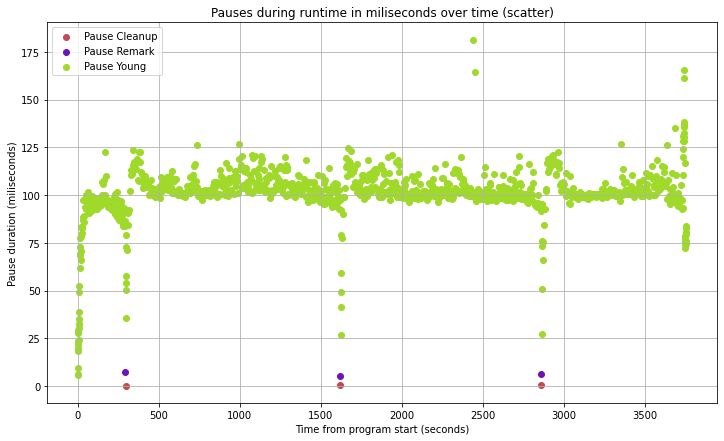

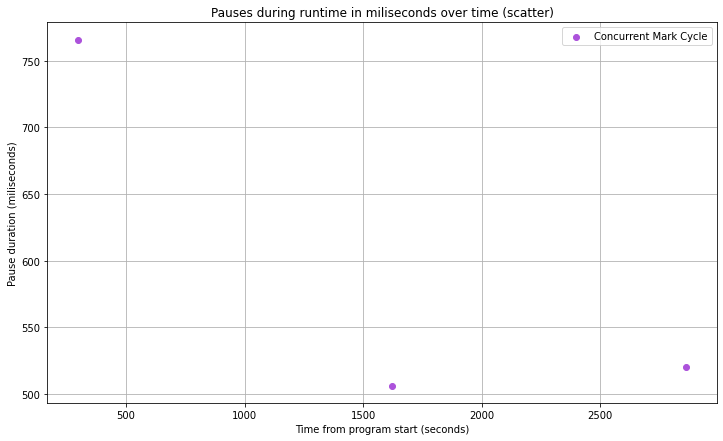

In [48]:
# Stop the world pauses
time_lists, duration_lists = transform.get_times_and_durations_from_event_lists(stw_seperated_tables)
labels = transform.get_event_table_labels(stw_seperated_tables)
plot = graph.comparrison_scatter(time_lists, duration_lists, None, None, labels)

# Concurrent periods
time_lists, duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_seperated_tables)
labels = transform.get_event_table_labels(concurrent_seperated_tables)
plot = graph.comparrison_scatter(time_lists, duration_lists, None, None, labels)

### Time spent in Concurrent Phases vs. Stop The World phases

<AxesSubplot:title={'center':'Comparison of event types'}, xlabel='Types of events', ylabel='Total pause time in seconds'>

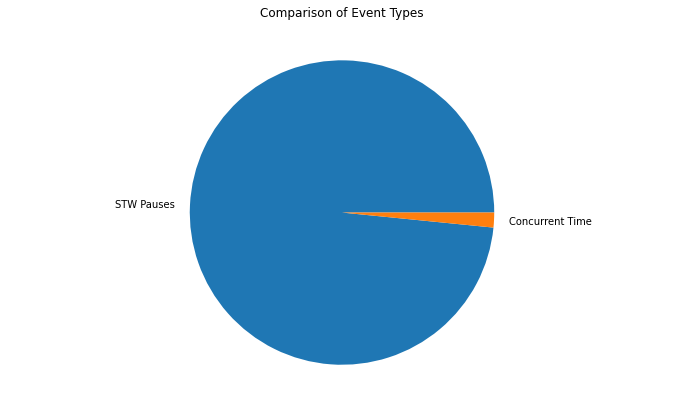

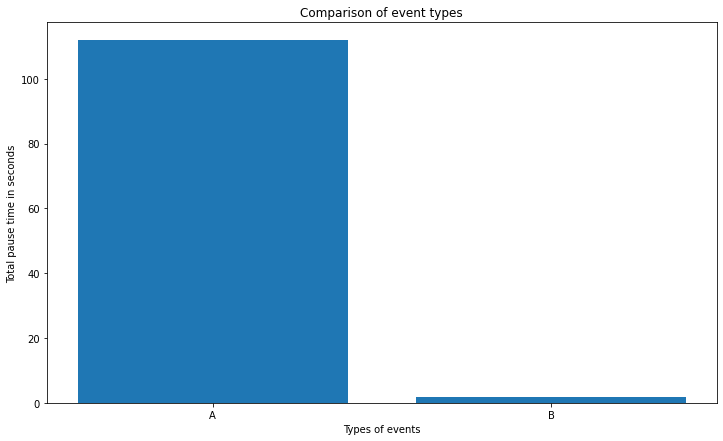

In [114]:
_ = graph.compare_eventtypes_pie(database_table)
_ = graph.compare_eventtypes_bar(database_table)
print("\n\nje\n\n")

In [50]:
# Access data from a particular log
log = "datasets/demo_data/demo_shenandoah.log"
data = search.getParsedData(log)
data = transform.getPausesData(data)
print(data)
#data = transform.getConcurrentData(data)
seperate_lists = transform.seperateEventName(data)
    
# for item in seperate_lists:
#     print(item)
#     print("\n\n\n")

NameError: name 'search' is not defined

In [ ]:
# Using the seperate lists, plot pauses in miliseconds
xdata = []
ydata = []
for i in range(len(seperate_lists)):
    x = list(map(float, x))
    y = list(map(float, y))
    xdata.append(x)
    ydata.append(y)
eventtype = seperate_lists[0]["EventType"].iloc[0]
labels = [seperate_lists[i]["EventType"].iloc[0] + " " + seperate_lists[i]["EventName"].iloc[0] for i in range(len(seperate_lists))]
graph = uplt.comparrison_scatter(xdata, ydata, None, None, labels)
graph = graph.set_title(eventtype + " comparions")

In [ ]:
short_labels = list(label[10:] for label in labels)
uplt.compare_pauses_percentiles(ydata, labels=short_labels)


In [ ]:
uplt.compare_trends(ydata, labels=short_labels)

In [ ]:
_= uplt.compare_paused_running_line(xdata, ydata, labels=labels)

In [ ]:
def confirm_difference(lists):
    [print(len(lists[i])) for i in range(len(lists))]
confirm_difference(ydata)
confirm_difference(xdata)